Final Project, Checkpoint 2

Group members: John Ng, Abhinav Verma, Vincent Huang, Andy Yu

# ***Data Preprocessing***

Import helpful statistical libraries/modules for data preprocessing & exploration.

In [1]:
import pandas as pd
import requests
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import string
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Importing the data set. We are using a dataset containing data of encounters of individuals attempting to cross the US border from various countries, but we will process/clean this to include only data from Mexico as that is our focus for this project.

In [2]:
border_crossing_df = pd.read_csv("nationwide-encounters-fy22-fy25-dec-aor.csv")
border_crossing_df

FileNotFoundError: [Errno 2] No such file or directory: 'nationwide-encounters-fy22-fy25-dec-aor.csv'

Checking data types

In [ ]:
border_crossing_df.dtypes

,0
Fiscal Year,object
Month Grouping,object
Month (abbv),object
Component,object
Land Border Region,object
Area of Responsibility,object
AOR (Abbv),object
Demographic,object
Citizenship,object
Title of Authority,object


Cleaning

Convert Fiscal Year column to int

In [ ]:
border_crossing_df['Fiscal Year'] = border_crossing_df['Fiscal Year'].str.extract(r'(\d+)')
border_crossing_df['Fiscal Year'] = border_crossing_df['Fiscal Year'].astype(int)

Determining the different regions reported for border crossing

In [ ]:
border_crossing_df['Land Border Region'].value_counts()

,count
Land Border Region,
Southwest Land Border,23184
Other,17253
Northern Land Border,9373


Since we're focusing on the relationship between Mexican crime statistics and border crossings, we will only be dealing with encounters of Mexican citizens

In [ ]:
border_crossing_df['Citizenship'].value_counts()

,count
Citizenship,
OTHER,4254
MEXICO,4111
GUATEMALA,2921
VENEZUELA,2846
COLOMBIA,2818
HONDURAS,2811
EL SALVADOR,2542
CUBA,2387
NICARAGUA,2382


In [ ]:
border_crossing_df = border_crossing_df[border_crossing_df['Citizenship'] == 'MEXICO']
border_crossing_df

,Fiscal Year,Month Grouping,Month (abbv),Component,Land Border Region,Area of Responsibility,AOR (Abbv),Demographic,Citizenship,Title of Authority,Encounter Type,Encounter Count
6,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,FMUA,MEXICO,Title 8,Inadmissibles,9
19,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,Single Adults,MEXICO,Title 8,Inadmissibles,21
37,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Buffalo Field Office,Buffalo,Accompanied Minors,MEXICO,Title 42,Expulsions,3
73,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Buffalo Field Office,Buffalo,Single Adults,MEXICO,Title 42,Expulsions,24
74,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Buffalo Field Office,Buffalo,Single Adults,MEXICO,Title 8,Inadmissibles,14
...,...,...,...,...,...,...,...,...,...,...,...,...
49753,2025,FYTD,OCT,U.S. Border Patrol,Southwest Land Border,Tucson Sector,TCA,Single Adults,MEXICO,Title 8,Apprehensions,4242
49767,2025,FYTD,OCT,U.S. Border Patrol,Southwest Land Border,Tucson Sector,TCA,UC / Single Minors,MEXICO,Title 8,Apprehensions,690
49779,2025,FYTD,OCT,U.S. Border Patrol,Southwest Land Border,Yuma Sector,YUM,FMUA,MEXICO,Title 8,Apprehensions,937
49794,2025,FYTD,OCT,U.S. Border Patrol,Southwest Land Border,Yuma Sector,YUM,Single Adults,MEXICO,Title 8,Apprehensions,523


Load the Mexico crime database

In [ ]:
mexico_crime_df = pd.read_csv("mexico_crime.csv")
mexico_crime_df

,year,entity_code,entity,affected_legal_good,type_of_crime,subtype_of_crime,modality,month,count
0,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With firearm,January,3
1,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With sharp weapon,January,1
2,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With another element,January,0
3,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,Not specified,January,2
4,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Manslaughter,With firearm,January,0
...,...,...,...,...,...,...,...,...,...
332411,2022,32,Zacatecas,Other legal interests affected (from common law),Counterfeiting,Forgery,Forgery,December,8
332412,2022,32,Zacatecas,Other legal interests affected (from common law),Environmental crimes,Environmental crimes,Against the environment,December,1
332413,2022,32,Zacatecas,Other legal interests affected (from common law),Crimes committed by public officials,Crimes committed by public servants,Crimes committed by public servants,December,20
332414,2022,32,Zacatecas,Other legal interests affected (from common law),Electoral crimes,Electoral crimes,Electoral crimes,December,0


Check the types of the Mexico crime columns

In [ ]:
mexico_crime_df.dtypes

,0
year,int64
entity_code,int64
entity,object
affected_legal_good,object
type_of_crime,object
subtype_of_crime,object
modality,object
month,object
count,int64


Determine the earliest and latest year for both databases

In [ ]:
earliest_year = max(border_crossing_df['Fiscal Year'].min(), mexico_crime_df['year'].min())
latest_year = min(border_crossing_df['Fiscal Year'].max(), mexico_crime_df['year'].max())
print(f'Earliest Possible Reported Year: {earliest_year}')
print(f'Latest Possible Reported Year: {latest_year}')

Earliest Possible Reported Year: 2022
Latest Possible Reported Year: 2023


We will be focusing on the data between 2022 and 2023 so we'll drop all other entries in both databases.

In [ ]:
border_crossing_df = border_crossing_df[
    (border_crossing_df['Fiscal Year'] >= earliest_year) &
    (border_crossing_df['Fiscal Year'] <= latest_year)
    ]
mexico_crime_df = mexico_crime_df[
    (mexico_crime_df['year'] >= earliest_year) &
    (mexico_crime_df['year'] <= latest_year)
    ]
display(border_crossing_df)
display(mexico_crime_df)

,Fiscal Year,Month Grouping,Month (abbv),Component,Land Border Region,Area of Responsibility,AOR (Abbv),Demographic,Citizenship,Title of Authority,Encounter Type,Encounter Count
6,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,FMUA,MEXICO,Title 8,Inadmissibles,9
19,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,Single Adults,MEXICO,Title 8,Inadmissibles,21
37,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Buffalo Field Office,Buffalo,Accompanied Minors,MEXICO,Title 42,Expulsions,3
73,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Buffalo Field Office,Buffalo,Single Adults,MEXICO,Title 42,Expulsions,24
74,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Buffalo Field Office,Buffalo,Single Adults,MEXICO,Title 8,Inadmissibles,14
...,...,...,...,...,...,...,...,...,...,...,...,...
31292,2023,Remaining,SEP,U.S. Border Patrol,Southwest Land Border,Tucson Sector,TCA,Single Adults,MEXICO,Title 8,Apprehensions,5282
31304,2023,Remaining,SEP,U.S. Border Patrol,Southwest Land Border,Tucson Sector,TCA,UC / Single Minors,MEXICO,Title 8,Apprehensions,868
31317,2023,Remaining,SEP,U.S. Border Patrol,Southwest Land Border,Yuma Sector,YUM,FMUA,MEXICO,Title 8,Apprehensions,79
31331,2023,Remaining,SEP,U.S. Border Patrol,Southwest Land Border,Yuma Sector,YUM,Single Adults,MEXICO,Title 8,Apprehensions,356


,year,entity_code,entity,affected_legal_good,type_of_crime,subtype_of_crime,modality,month,count
21952,2022,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With firearm,January,3
21953,2022,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With sharp weapon,January,3
21954,2022,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With another element,January,0
21955,2022,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,Not specified,January,0
21956,2022,1,Aguascalientes,Life and bodily integrity,Homicide,Manslaughter,With firearm,January,0
...,...,...,...,...,...,...,...,...,...
332411,2022,32,Zacatecas,Other legal interests affected (from common law),Counterfeiting,Forgery,Forgery,December,8
332412,2022,32,Zacatecas,Other legal interests affected (from common law),Environmental crimes,Environmental crimes,Against the environment,December,1
332413,2022,32,Zacatecas,Other legal interests affected (from common law),Crimes committed by public officials,Crimes committed by public servants,Crimes committed by public servants,December,20
332414,2022,32,Zacatecas,Other legal interests affected (from common law),Electoral crimes,Electoral crimes,Electoral crimes,December,0


In [ ]:
border_crossing_df.reset_index(drop=True, inplace=True)
mexico_crime_df.reset_index(drop=True, inplace=True)
display(border_crossing_df)
display(mexico_crime_df)

,Fiscal Year,Month Grouping,Month (abbv),Component,Land Border Region,Area of Responsibility,AOR (Abbv),Demographic,Citizenship,Title of Authority,Encounter Type,Encounter Count
0,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,FMUA,MEXICO,Title 8,Inadmissibles,9
1,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,Single Adults,MEXICO,Title 8,Inadmissibles,21
2,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Buffalo Field Office,Buffalo,Accompanied Minors,MEXICO,Title 42,Expulsions,3
3,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Buffalo Field Office,Buffalo,Single Adults,MEXICO,Title 42,Expulsions,24
4,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Buffalo Field Office,Buffalo,Single Adults,MEXICO,Title 8,Inadmissibles,14
...,...,...,...,...,...,...,...,...,...,...,...,...
2749,2023,Remaining,SEP,U.S. Border Patrol,Southwest Land Border,Tucson Sector,TCA,Single Adults,MEXICO,Title 8,Apprehensions,5282
2750,2023,Remaining,SEP,U.S. Border Patrol,Southwest Land Border,Tucson Sector,TCA,UC / Single Minors,MEXICO,Title 8,Apprehensions,868
2751,2023,Remaining,SEP,U.S. Border Patrol,Southwest Land Border,Yuma Sector,YUM,FMUA,MEXICO,Title 8,Apprehensions,79
2752,2023,Remaining,SEP,U.S. Border Patrol,Southwest Land Border,Yuma Sector,YUM,Single Adults,MEXICO,Title 8,Apprehensions,356


,year,entity_code,entity,affected_legal_good,type_of_crime,subtype_of_crime,modality,month,count
0,2022,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With firearm,January,3
1,2022,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With sharp weapon,January,3
2,2022,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With another element,January,0
3,2022,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,Not specified,January,0
4,2022,1,Aguascalientes,Life and bodily integrity,Homicide,Manslaughter,With firearm,January,0
...,...,...,...,...,...,...,...,...,...
68987,2022,32,Zacatecas,Other legal interests affected (from common law),Counterfeiting,Forgery,Forgery,December,8
68988,2022,32,Zacatecas,Other legal interests affected (from common law),Environmental crimes,Environmental crimes,Against the environment,December,1
68989,2022,32,Zacatecas,Other legal interests affected (from common law),Crimes committed by public officials,Crimes committed by public servants,Crimes committed by public servants,December,20
68990,2022,32,Zacatecas,Other legal interests affected (from common law),Electoral crimes,Electoral crimes,Electoral crimes,December,0


Basic Data Exploration

Dataset Overview

In [ ]:
print("Mexican Border Crossings Dataset Shape:", border_crossing_df.shape)
print("\nFirst 5 Rows:")
print(border_crossing_df.head())

Mexican Border Crossings Dataset Shape: (2754, 12)

First 5 Rows:
   Fiscal Year Month Grouping Month (abbv)                   Component  \
0         2022           FYTD          DEC  Office of Field Operations   
1         2022           FYTD          DEC  Office of Field Operations   
2         2022           FYTD          DEC  Office of Field Operations   
3         2022           FYTD          DEC  Office of Field Operations   
4         2022           FYTD          DEC  Office of Field Operations   

     Land Border Region Area of Responsibility AOR (Abbv)         Demographic  \
0  Northern Land Border    Boston Field Office     Boston                FMUA   
1  Northern Land Border    Boston Field Office     Boston       Single Adults   
2  Northern Land Border   Buffalo Field Office    Buffalo  Accompanied Minors   
3  Northern Land Border   Buffalo Field Office    Buffalo       Single Adults   
4  Northern Land Border   Buffalo Field Office    Buffalo       Single Adults   

  

Summary Statistics

In [ ]:
print(border_crossing_df.describe(include='all'))

        Fiscal Year Month Grouping Month (abbv)                   Component  \
count   2754.000000           2754         2754                        2754   
unique          NaN              2           12                           2   
top             NaN      Remaining          APR  Office of Field Operations   
freq            NaN           2050          250                        1443   
mean    2022.483660            NaN          NaN                         NaN   
std        0.499824            NaN          NaN                         NaN   
min     2022.000000            NaN          NaN                         NaN   
25%     2022.000000            NaN          NaN                         NaN   
50%     2022.000000            NaN          NaN                         NaN   
75%     2023.000000            NaN          NaN                         NaN   
max     2023.000000            NaN          NaN                         NaN   

           Land Border Region Area of Responsibilit

Check for missing values

In [ ]:
print(border_crossing_df.isnull().sum())

Fiscal Year               0
Month Grouping            0
Month (abbv)              0
Component                 0
Land Border Region        0
Area of Responsibility    0
AOR (Abbv)                0
Demographic               0
Citizenship               0
Title of Authority        0
Encounter Type            0
Encounter Count           0
dtype: int64


We can see that there doesn't seem to be any null values found, so the dataset is good on missing values.

# ***Data Exploration and Summary Statistics***

Distribution of Mexican Encounters by Region
# Hypothesis: The Southwest Land Border has significantly more Mexican encounters than other regions


Group by region and sum encounters

<ipython-input-26-d5d9e511fc11>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")


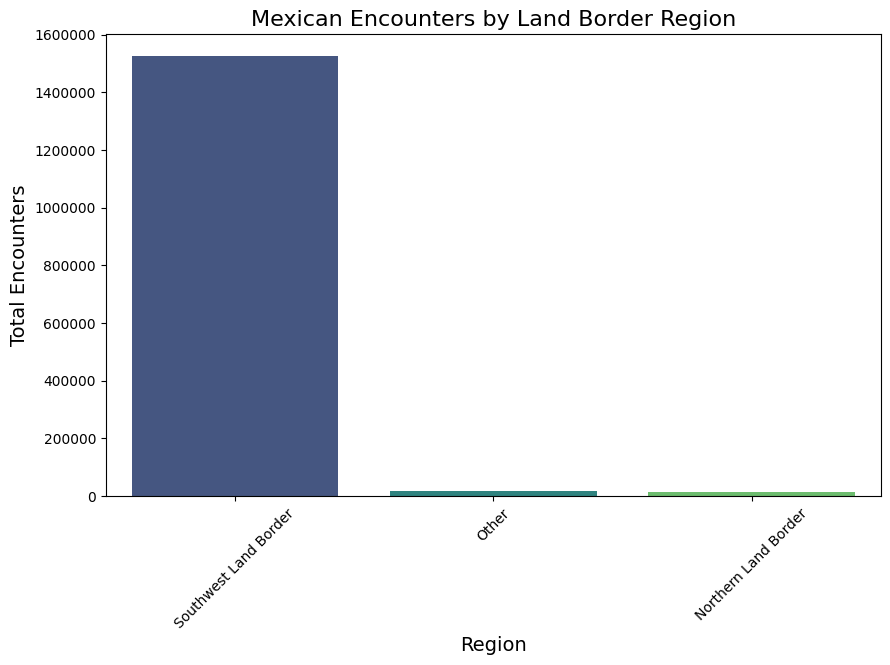

In [ ]:
region_counts = border_crossing_df.groupby('Land Border Region')['Encounter Count'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title('Mexican Encounters by Land Border Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Encounters', fontsize=14)
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

**Conclusion:**

From a quick check of grouping total encounters counts across the border by regions and visualizing as a bar chart, we can see that there seems to be a correlation with border crossings and region, with the region of the Southwest Land Border making up the majority of the crossings. On the other hand, it seems like Northern Land Border and other regions seem to be marginal compared to the Southwest Land Border which seems to be where the majority of total border crossings from Mexico to the United States occur.

From this, we can infer that its possible that the Southwest Land Border region could be closer to the United States and/or easier and more accessible when it comes to crossing. Or it could also hint at lack of border security in that region which is why there are more crossings there. In any case, it seems that if future policy making on border control most likely would need focus on the Southwest Land Border regions given the number of cases of border crossing that occur there.

Distribution of Border Crossings by Encounter Type (Pie Chart)


=== Encounter Type Distribution ===


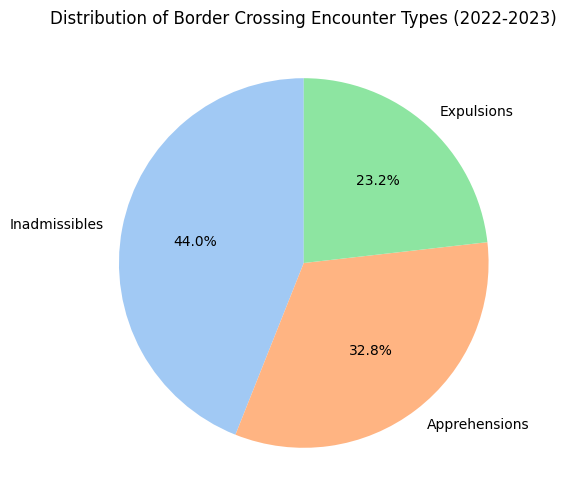

In [ ]:
print("\n=== Encounter Type Distribution ===")
encounter_counts = border_crossing_df['Encounter Type'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(encounter_counts, labels=encounter_counts.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Border Crossing Encounter Types (2022-2023)')
plt.show()

Statistical tests for encounter type distribution

Statistical test (ANOVA)

In [ ]:
regions = border_crossing_df['Land Border Region'].unique()
region_groups = [border_crossing_df[border_crossing_df['Land Border Region'] == r]['Encounter Count'] for r in regions]

f_stat, p_value = stats.f_oneway(*region_groups)
print(f"\nANOVA Test for Regional Differences: F-statistic={f_stat:.2f}, p-value={p_value:.4f}")

if p_value < 0.05:
    print("Conclusion: There are significant differences in Mexican encounters between regions")

    # Post-hoc
    data = pd.concat([
        pd.DataFrame({'region': r, 'count': border_crossing_df[border_crossing_df['Land Border Region'] == r]['Encounter Count']})
        for r in regions
    ])

    tukey = pairwise_tukeyhsd(data['count'], data['region'], alpha=0.05)
    print("\nPost-hoc Tukey HSD Test:")
    print(tukey)
else:
    print("Conclusion: No significant differences found between regions for Mexican encounters")


ANOVA Test for Regional Differences: F-statistic=104.88, p-value=0.0000
Conclusion: There are significant differences in Mexican encounters between regions

Post-hoc Tukey HSD Test:
                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
       group1                group2        meandiff p-adj    lower     upper   reject
-------------------------------------------------------------------------------------
Northern Land Border                 Other   1.7127 0.9998 -232.3258  235.7513  False
Northern Land Border Southwest Land Border 959.5553    0.0  757.2745 1161.8361   True
               Other Southwest Land Border 957.8426    0.0  770.8327 1144.8525   True
-------------------------------------------------------------------------------------


**Conclusion:**

Since we are trying to compare the encounters among three different groups, we use the ANOVA test since it is helpful for when comparing and working with more than two groups of data. As seen by the ANOVA test result, there is a very low p-value and the F-statistic, we see that there is a statistically significant difference in the mean encounter counts between different regions. Thus, we have strong evidence to reject the null hypothesis which states that there are little or no differences among regions when it comes to total encounter counts.

Since the ANOVA test only tells us if there are are differences in encounter counts among the three regions but not where those differences lie, we use an additional statistical test, the Post-Hoc Tukey HSD test, to determine where those differences lie. In particular, we see that Northern Land Border and Other regions (which do not include Southwest Land Border) seem to not have a significant difference given the high p-value of 0.9998 while both the Northern Land Border and Other regions are significantly different from the Southwest Land Border with both groups having a p-value of 0 when paired and compared with the Southwest Land Border. This is also further supported when looking at the low mean difference when regions excluding the Southwest Land Border are exluded and the high mean difference whenever the region of Southwest Land Border is compared.

Thus, when taking into our observation from our visualization made previously on encounters count and regions plus our statistical analysis, we know that not only are most border crossings occuring at the Southwest Land Border but also that the Northwest Land Border and other regions are very similar, so these statistical tests give us further evidence and reasons to support the suggestion made in our previous conclusion that policy making on border control may need to focus more on the Southwest Land Border region.

Differences in Encounter Types for Mexican Citizens
# Hypothesis: Certain encounter types are more common for Mexican citizens

<ipython-input-29-dfeb7379da6f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=encounter_type_counts.index, y=encounter_type_counts.values, palette="mako")


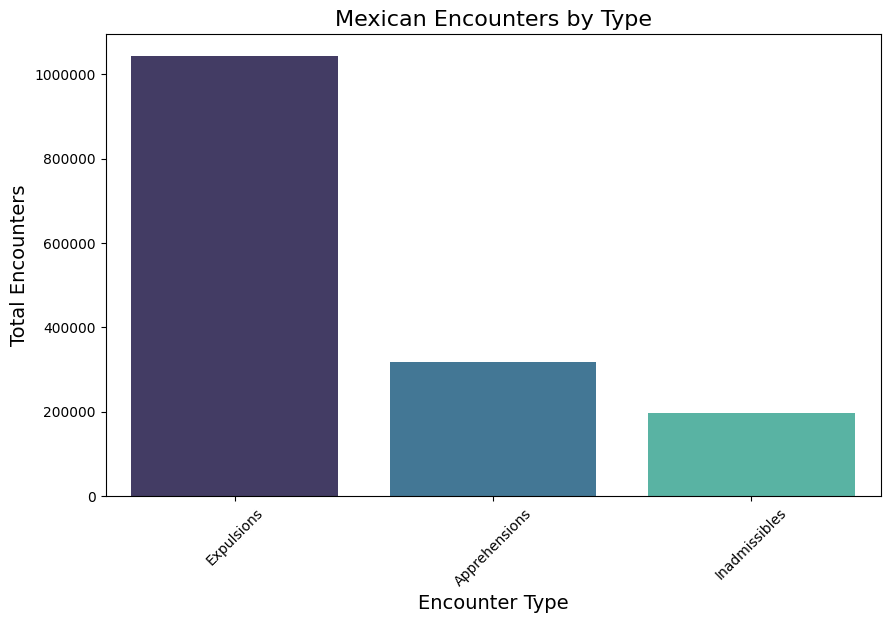


Chi-square Test for Encounter Types: χ²=803976.75, p-value=0.0000
Conclusion: Encounter types for Mexican citizens are not equally distributed


In [ ]:
encounter_type_counts = border_crossing_df.groupby('Encounter Type')['Encounter Count'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=encounter_type_counts.index, y=encounter_type_counts.values, palette="mako")
plt.title('Mexican Encounters by Type', fontsize=16)
plt.xlabel('Encounter Type', fontsize=14)
plt.ylabel('Total Encounters', fontsize=14)
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# Chi-square test
observed = encounter_type_counts.values
expected = np.ones_like(observed) * observed.mean()

chi2, p = stats.chisquare(observed, expected)
print(f"\nChi-square Test for Encounter Types: χ²={chi2:.2f}, p-value={p:.4f}")

if p < 0.05:
    print("Conclusion: Encounter types for Mexican citizens are not equally distributed")
else:
    print("Conclusion: No significant difference in encounter type frequencies for Mexican citizens")

**Conclusion:**

Since we are trying to compare groups of data (Expulsions, Apprehensions, Inadmissibles), we chose to use Chi-Squared as our statistical test since its useful for dealing and comparing categorical data.

From our statistical test, the p-value is low meaning that we have lots of evidence against our null hypothesis which is that there is no particular differences in the number of encounters among all the encounter types. So given our statistical test and the resulting low p-value, we can infer that the encounter types are not evenly distributed.

In addition, as we can see in our bar graph visualization, we can confirm that our hypothesis (that the total number of encounters for each encounter type is not evenly distributed and are different) is correct.

In particular, we can see that the highest cases of encounter types are expulsions meaning that most people who have attempted crossing over from Mexico to the United States (the ones that are most likely illegally crossing given their removal) end up being removed from the United States after they cross over rather than arrested before they cross or rather than being denied at the port of entry. This implies that either border control is either more lenient in allowing people from Mexico cross over to the United States and more strict when it comes to letting them stay in the United States or that there may be vulnerabilities in border security and that there are lots of people from Mexico who are able to cross without getting stopped or seen by border control and security. Depending on which is the case, it could hint at whether or not a more thorough border security process should be implemented to prevent illegal crossing.